<a href="https://colab.research.google.com/github/emamanni/AnalisiDeiDati24-25/blob/main/16_CART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CART

In questo notebook si determina un albero di classificazione con l'algoritmo CART, utilizzando la libreria `sklearn`.

Innanzitutto, generiamo casualmente dei punti nel piano cartesiano, a cui assegneremo il colore rosso o il colore blu.

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
# dati di training
X = [[3,3], [7,9], [19,6], [14,11], [19,4], [21,7], [7,17], [8,23], [11,21], [37,25], [39,22], [42,17], [16,13], [28,8], [32,9], [36,6], [24,21], [31,24], [31,17]]
Y = ['r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'b', 'r', 'b', 'r', 'b', 'b', 'r']

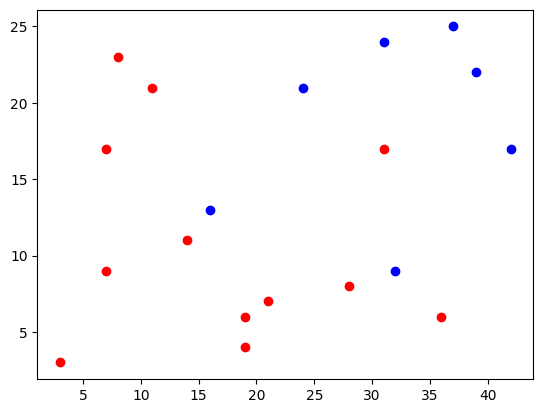

In [ ]:
# separiamo i dati in due insiemi per la visualizzazione
x_1_r = []
x_1_b = []
x_2_r = []
x_2_b = []
for i in range(len(X)):
    if Y[i]=='r':
        x_1_r.append(X[i][0])
        x_2_r.append(X[i][1])
    else:
        x_1_b.append(X[i][0])
        x_2_b.append(X[i][1])
plt.scatter(x_1_r,x_2_r, color='r')
plt.scatter(x_1_b,x_2_b, color='b')
plt.show()

In [ ]:
# creiamo ed addestriamo l'albero di classificazione

# istanziamo un classificatore ad albero decisionale
tree_classifier = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=5, min_samples_leaf=2)

# addestriamo il classificatore sul training set
# (ATTENZIONE: qui stiamo usando l'intero set di dati come training set)
tree_classifier = tree_classifier.fit(X, Y)

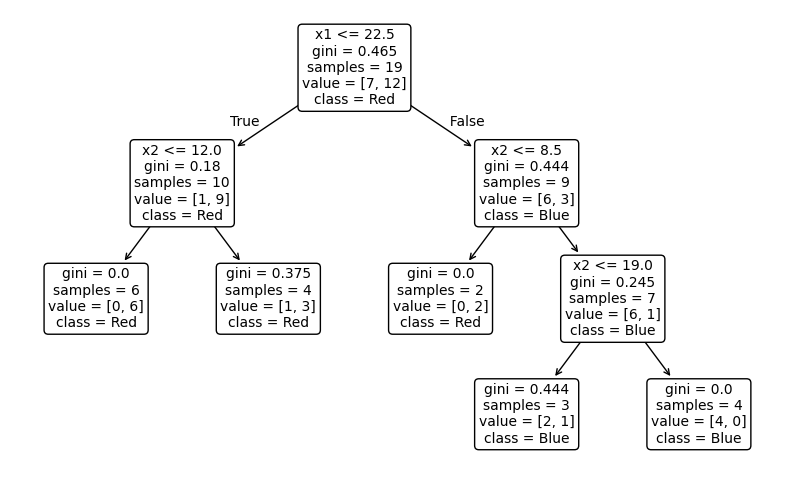

In [ ]:
# visualizziamo l'albero di classificazione
fig, ax = plt.subplots(figsize=(10, 6))
tree.plot_tree(
    tree_classifier,
    #filled=True,
    rounded=True,
    fontsize=10,
    ax=ax,
    #node_ids=True,
    feature_names=["x1", "x2"],
    class_names=["Blue", "Red"]
)
plt.show()

In [ ]:
# facciamo una previsione
previsione = tree_classifier.predict([[16, 20]])[0]
print("Il punto (16, 20) è classificato come", previsione)

Il punto (16, 20) è classificato come r


In [ ]:
# facciamo una previsione probabilistica
previsione_prob = tree_classifier.predict_proba([[16., 20.]])[0]
print("La classificazione probabilistica per il punto (16, 20) è", previsione_prob)

La classificazione probabilistica per il punto (16, 20) è [0.25 0.75]


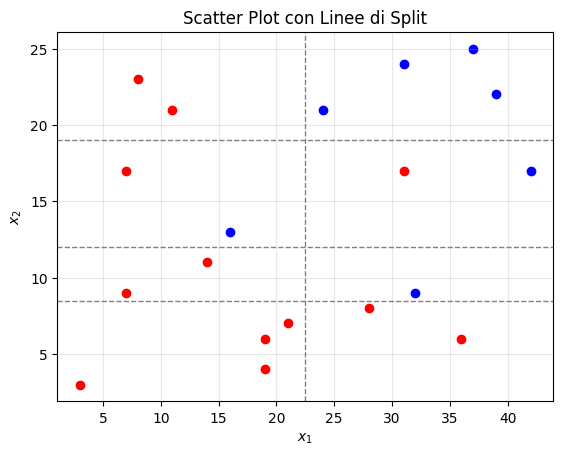

In [ ]:
# plot dei punti
plt.scatter(x_1_r, x_2_r, color='red', label='Red')
plt.scatter(x_1_b, x_2_b, color='blue', label='Blue')

# estraiamo le informazioni sugli split
n_nodes = tree_classifier.tree_.node_count
children_left = tree_classifier.tree_.children_left
children_right = tree_classifier.tree_.children_right
feature = tree_classifier.tree_.feature
threshold = tree_classifier.tree_.threshold

# iteriamo sui nodi per tracciare le linee di split
for node_id in range(n_nodes):
    # verifichiamo che il nodo non sia una foglia
    if children_left[node_id] != children_right[node_id]:
        # ottieniamo la feature e il valore di split
        split_feature = feature[node_id]
        split_value = threshold[node_id]

        # se la feature è `0` (x1), disegniamo una linea verticale
        if split_feature == 0:
            plt.axvline(x=split_value, color='grey', linestyle='--', linewidth=1)
        # se la feature è `1` (x2), disegniamo una linea orizzontale
        elif split_feature == 1:
            plt.axhline(y=split_value, color='grey', linestyle='--', linewidth=1)

# Aggiungiamo titolo ed etichette sugli assi
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Scatter Plot con Linee di Split")
#plt.legend()
plt.grid(alpha=0.3)
plt.show()